데이터 탐색
==

다루는 내용
--
- 데이터 특성 보기, 데이터 탐색, 시각화
- 클러스터링

데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

필요한 라이브러리(모듈) 설치
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

데이터 읽기
--

In [3]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [4]:
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [93]:
type(power_data)

pandas.core.frame.DataFrame

In [94]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [95]:
power = power_data.set_index('구분')

In [96]:
power = power.drop(['합계', '개성'], errors='ignore')

In [97]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

In [114]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
서울,27647345,1918893


데이터 특성 보기
--
- boxplot
- barplot
- histogram

박스플롯
--

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [115]:
import platform
from matplotlib import font_manager,rc
import matplotlib
# '-' 부호가 제대로 표시되게 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)

In [116]:
power.describe()

,서비스업,제조업
count,1.700000e+01,1.700000e+01
mean,8.291312e+06,1.523205e+07
std,8.708909e+06,1.524290e+07
min,6.454240e+05,2.415370e+05
25%,3.955921e+06,2.910768e+06
50%,5.690659e+06,1.236782e+07
75%,7.582169e+06,2.145393e+07
max,3.343455e+07,5.660333e+07


In [117]:
power.drop('합계', axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)

KeyError: "['합계'] not found in axis"

<AxesSubplot:>

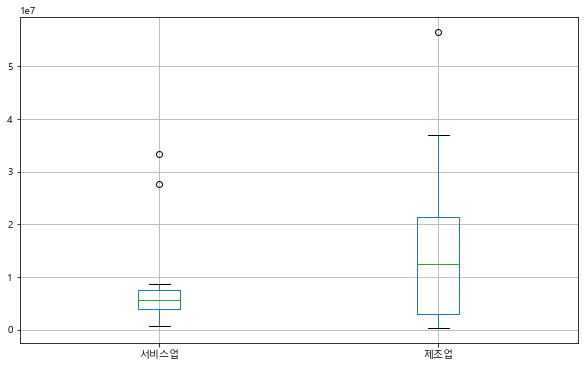

In [118]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

In [119]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
서울,27647345,1918893


In [120]:
power = power.drop('합계', axis=1)

KeyError: "['합계'] not found in axis"

<AxesSubplot:ylabel='구분'>

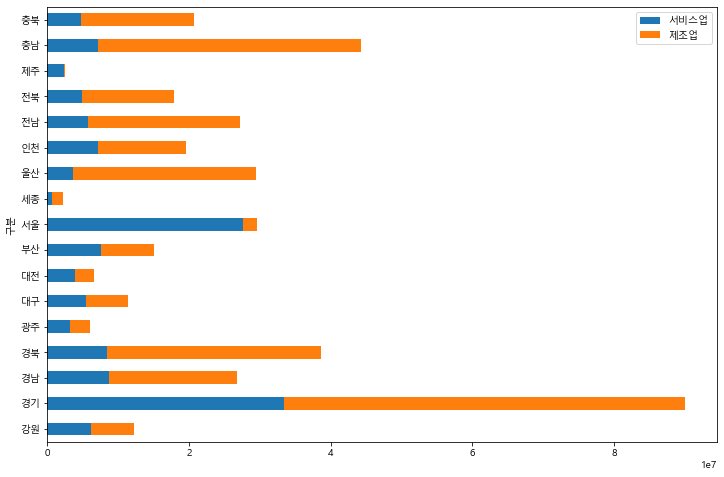

In [121]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

In [122]:
power = power.drop(['합계', '개성'])

KeyError: "['합계' '개성'] not found in axis"

<AxesSubplot:ylabel='구분'>

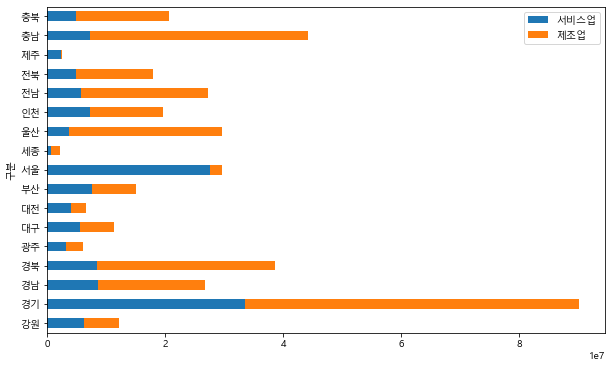

In [123]:
power.plot(kind='barh', figsize=(10,6), stacked=True)

In [124]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

KeyError: "['주거용', '공공용', '농림어업'] not in index"

<AxesSubplot:ylabel='구분'>

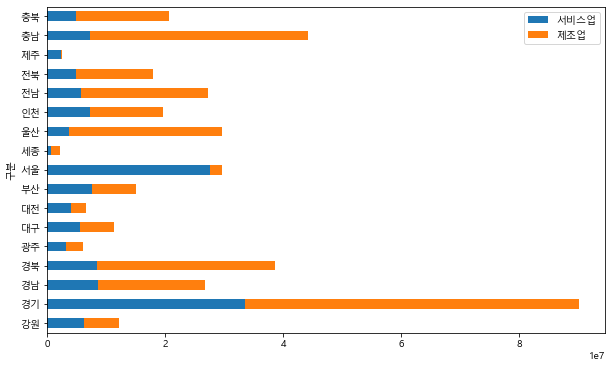

In [125]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [126]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


히스토그램
--

<AxesSubplot:>

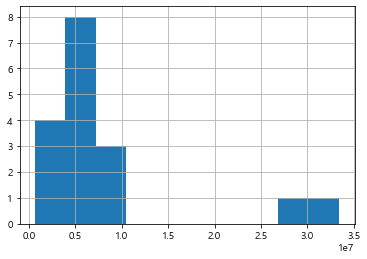

In [127]:
power['서비스업'].hist()

스캐터 플롯
--

In [128]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
서울,27647345,1918893


In [131]:
print(power.shape)

(17, 2)


In [132]:
n_samples = power.shape[0]
n_samples

17

In [133]:
print(n_samples)

17


Text(0, 0.5, '제조업')

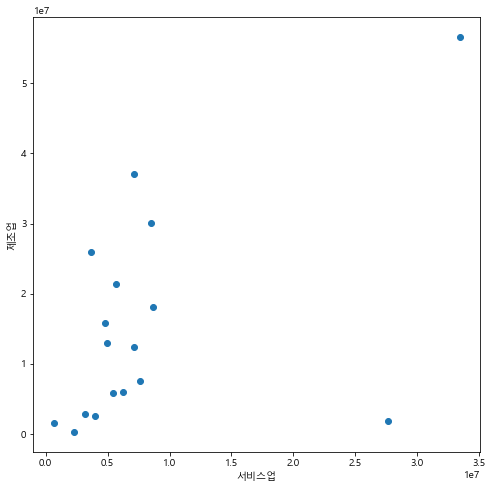

In [134]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

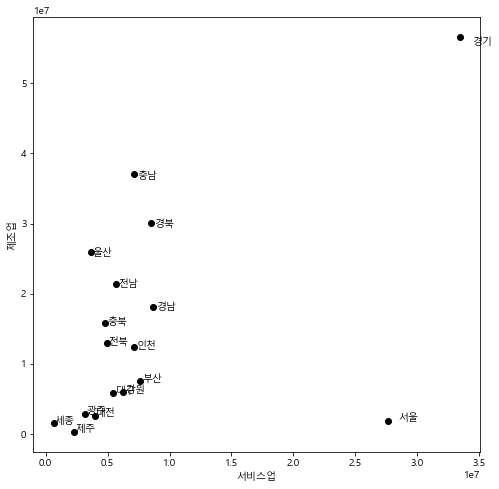

In [135]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [136]:
power = power.drop(['경기', '서울'])

In [137]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


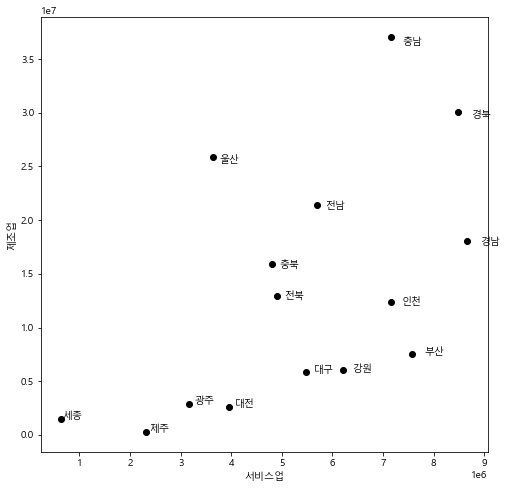

In [138]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

# -------------------------------------------

In [75]:
#필요한 라이브러리(모듈) 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
#데이터 읽기
power_data = pd.read_excel('data/HOME_발전·판매_판매전력량_시도별용도별.xlsx') #tab을 눌러서 위치를 확인할 수 있다.
print(power_data.shape)

(21, 28)


In [84]:
power_data

,구분,주거용,업무용,Unnamed: 3,Unnamed: 4,산업용,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,합계
0,NaN,NaN,공공용,서비스업,업무용 계,농림어업,광업,제조업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업용 계,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,식료품제조,"섬유,의류","목재,나무",...,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,제조업 계,NaN,NaN
2,강원,2.081091e+06,1.43543e+06,6.29591e+06,7.73134e+06,693533,408545,581065,12215.5,19164.8,...,1289.78,35330,43875.6,119820,101151,13386.8,3414.79,5.45377e+06,6.55584e+06,1.636827e+07
3,개성,1.059430e+02,2403.61,1275.99,3679.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.785534e+03
4,경기,1.822849e+07,5.76801e+06,3.56604e+07,4.14284e+07,2.6054e+06,274639,2.78004e+06,1.92182e+06,476956,...,232628,987827,2.79808e+07,2.87264e+06,94631.2,2.22799e+06,134107,6.04854e+07,6.33654e+07,1.230223e+08
5,경남,4.475992e+06,1.45643e+06,8.73362e+06,1.01901e+07,2.21189e+06,67524,978524,322642,57654.1,...,5307.19,942620,480832,2.10432e+06,1.97297e+06,339035,50607.8,1.75266e+07,1.9806e+07,3.447202e+07
6,경북,3.466430e+06,1.66127e+06,8.52614e+06,1.01874e+07,1.92767e+06,200766,614329,3.37752e+06,69724.2,...,7635.38,813989,3.97447e+06,2.36149e+06,130965,63632.3,73340.5,2.85325e+07,3.06609e+07,4.431477e+07
7,광주,2.038974e+06,574010,3.20739e+06,3.7814e+06,74320.3,1779.94,167493,211957,6545.8,...,4851.91,230318,697747,478040,5835.84,20532.6,16448.5,2.70682e+06,2.78292e+06,8.603297e+06
8,대구,3.252483e+06,852760,5.54282e+06,6.39558e+06,71232.2,6673.3,223845,900120,16432,...,57693.7,197825,197754,1.33204e+06,49575.8,41574.3,50978.4,5.53962e+06,5.61752e+06,1.526558e+07
9,대전,1.938646e+06,1.04276e+06,4.06448e+06,5.10724e+06,32480.6,982.453,211245,36474.6,4060.42,...,2487.32,78919.7,231436,198962,7594.42,35667.6,1904.76,2.33635e+06,2.36982e+06,9.415699e+06


In [78]:
type(power_data)

pandas.core.frame.DataFrame

In [79]:
power_data.columns

Index(['구분', '주거용', '업무용', 'Unnamed: 3', 'Unnamed: 4', '산업용', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', '합계'],
      dtype='object')

In [85]:
power_data

,구분,주거용,업무용,Unnamed: 3,Unnamed: 4,산업용,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,합계
0,NaN,NaN,공공용,서비스업,업무용 계,농림어업,광업,제조업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업용 계,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,식료품제조,"섬유,의류","목재,나무",...,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,제조업 계,NaN,NaN
2,강원,2.081091e+06,1.43543e+06,6.29591e+06,7.73134e+06,693533,408545,581065,12215.5,19164.8,...,1289.78,35330,43875.6,119820,101151,13386.8,3414.79,5.45377e+06,6.55584e+06,1.636827e+07
3,개성,1.059430e+02,2403.61,1275.99,3679.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.785534e+03
4,경기,1.822849e+07,5.76801e+06,3.56604e+07,4.14284e+07,2.6054e+06,274639,2.78004e+06,1.92182e+06,476956,...,232628,987827,2.79808e+07,2.87264e+06,94631.2,2.22799e+06,134107,6.04854e+07,6.33654e+07,1.230223e+08
5,경남,4.475992e+06,1.45643e+06,8.73362e+06,1.01901e+07,2.21189e+06,67524,978524,322642,57654.1,...,5307.19,942620,480832,2.10432e+06,1.97297e+06,339035,50607.8,1.75266e+07,1.9806e+07,3.447202e+07
6,경북,3.466430e+06,1.66127e+06,8.52614e+06,1.01874e+07,1.92767e+06,200766,614329,3.37752e+06,69724.2,...,7635.38,813989,3.97447e+06,2.36149e+06,130965,63632.3,73340.5,2.85325e+07,3.06609e+07,4.431477e+07
7,광주,2.038974e+06,574010,3.20739e+06,3.7814e+06,74320.3,1779.94,167493,211957,6545.8,...,4851.91,230318,697747,478040,5835.84,20532.6,16448.5,2.70682e+06,2.78292e+06,8.603297e+06
8,대구,3.252483e+06,852760,5.54282e+06,6.39558e+06,71232.2,6673.3,223845,900120,16432,...,57693.7,197825,197754,1.33204e+06,49575.8,41574.3,50978.4,5.53962e+06,5.61752e+06,1.526558e+07
9,대전,1.938646e+06,1.04276e+06,4.06448e+06,5.10724e+06,32480.6,982.453,211245,36474.6,4060.42,...,2487.32,78919.7,231436,198962,7594.42,35667.6,1904.76,2.33635e+06,2.36982e+06,9.415699e+06


In [86]:
power_data.head()

,구분,주거용,업무용,Unnamed: 3,Unnamed: 4,산업용,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,합계
0,NaN,NaN,공공용,서비스업,업무용 계,농림어업,광업,제조업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,산업용 계,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,식료품제조,"섬유,의류","목재,나무",...,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,제조업 계,NaN,NaN
2,강원,2.081091e+06,1.43543e+06,6.29591e+06,7.73134e+06,693533,408545,581065,12215.5,19164.8,...,1289.78,35330,43875.6,119820,101151,13386.8,3414.79,5.45377e+06,6.55584e+06,1.636827e+07
3,개성,1.059430e+02,2403.61,1275.99,3679.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.785534e+03
4,경기,1.822849e+07,5.76801e+06,3.56604e+07,4.14284e+07,2.6054e+06,274639,2.78004e+06,1.92182e+06,476956,...,232628,987827,2.79808e+07,2.87264e+06,94631.2,2.22799e+06,134107,6.04854e+07,6.33654e+07,1.230223e+08


In [87]:
power = power_data.drop(['합계','개성'])

KeyError: "['합계' '개성'] not found in axis"

In [88]:
power.T

구분,강원,경남,경북,광주,대구,대전,부산,세종,울산,인천,전남,전북,제주,충남,충북
서비스업,6203749,8667737,8487402,3174973,5470438,3955921,7582169,645424,3649386,7154416,5690659,4910318,2308732,7164439,4804638
제조업,6002286,18053778,30115601,2910768,5862633,2608343,7512588,1502922,25883132,12367816,21453926,12965875,241537,37057955,15883448


In [59]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 강원 to 충북
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서비스업    15 non-null     int64
 1   제조업     15 non-null     int64
dtypes: int64(2)
memory usage: 1000.0+ bytes


In [60]:
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

In [61]:
power.describe()

,서비스업,제조업
count,1.500000e+01,1.500000e+01
mean,5.324693e+06,1.336151e+07
std,2.309461e+06,1.126382e+07
min,6.454240e+05,2.415370e+05
25%,3.802654e+06,4.386700e+06
50%,5.470438e+06,1.236782e+07
75%,7.159428e+06,1.975385e+07
max,8.667737e+06,3.705796e+07


In [62]:
power.drop('합계',axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)

KeyError: "['합계'] not found in axis"

<AxesSubplot:>

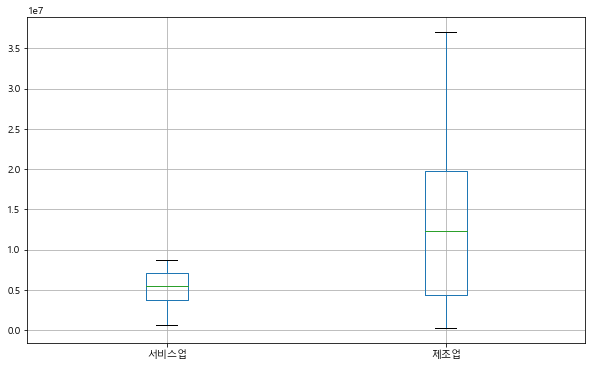

In [63]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

<AxesSubplot:ylabel='구분'>

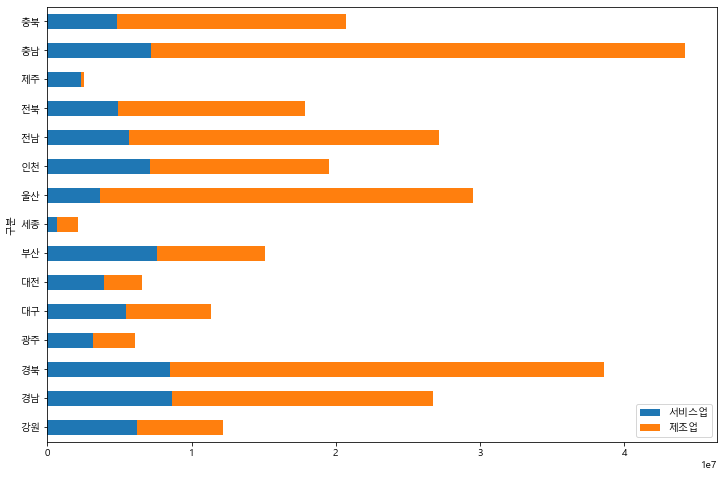

In [64]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

In [65]:
sample= ['주거용']  #일부만 가져오고 싶다
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

KeyError: "None of [Index(['주거용'], dtype='object')] are in the [columns]"

In [ ]:
power =power[['서비스업', '제조업']]
power.head()

In [ ]:
power['주거용'].hist()

In [ ]:
#스캐터 플롯
print(power.shape)

In [66]:
power.shape[0]

15

In [67]:
n_samples = power.shape[0]
n_samples

15

In [68]:
print(n_samples)

15


Text(0, 0.5, '서비스업')

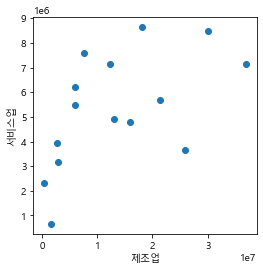

In [69]:
plt.figure(figsize=(4,4))
plt.scatter(power['제조업'], power['서비스업'])
plt.xlabel('제조업')
plt.ylabel('서비스업')

In [70]:
power.shape

(15, 2)

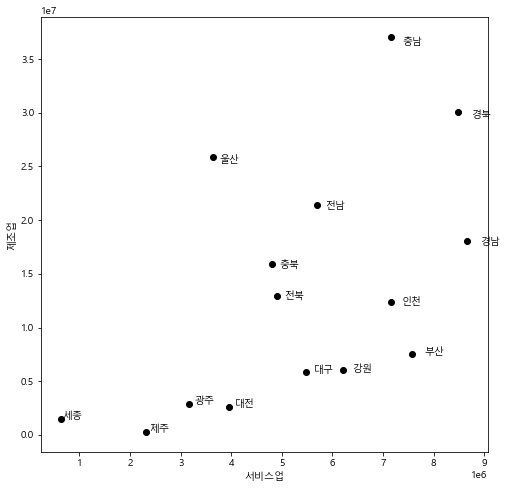

In [71]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'], c='k', marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98,
            power.index[n])

In [72]:
power = power.drop(['경기', '서울'], errors='ignore')

In [73]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


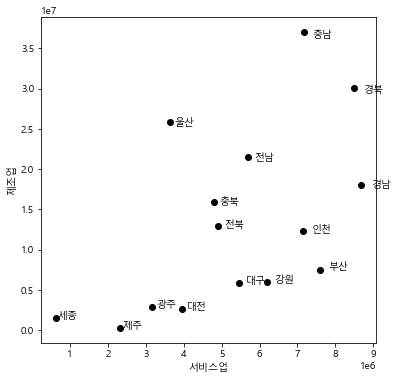

In [74]:
plt.figure(figsize=(6,6))
plt.scatter(power['서비스업'], power['제조업'], c='k', marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98,
            power.index[n])